## 1. Titanic Data에서 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## 데이터 불러오기
titanic_df = pd.read_csv("./data/titanic_train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## 상관계수
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 부모/자식 혹은 형제/배우자가 Titanic호에 있을 때의 생존율 비교

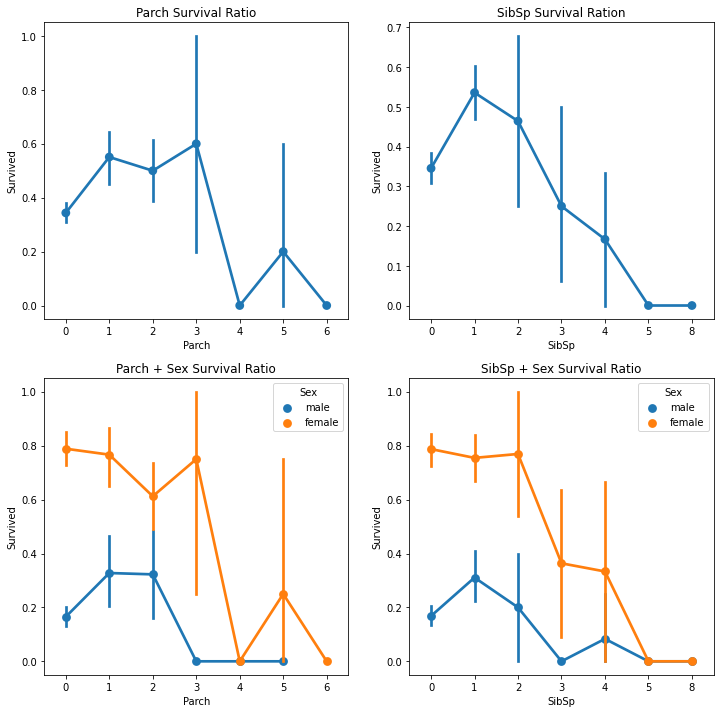

In [5]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

axes[0, 0].set_title("Parch Survival Ratio")
axes[0, 1].set_title("SibSp Survival Ration")
axes[1, 0].set_title("Parch + Sex Survival Ratio")
axes[1, 1].set_title("SibSp + Sex Survival Ratio")

sns.pointplot(x='Parch', y='Survived', kind='point', data=titanic_df, ax=axes[0, 0])
sns.pointplot(x='SibSp', y='Survived', kind='point', data=titanic_df, ax=axes[0, 1])
sns.pointplot(x='Parch', y='Survived', hue='Sex', kind='point', data=titanic_df, ax=axes[1, 0])
sns.pointplot(x='SibSp', y='Survived', hue='Sex', kind='point', data=titanic_df, ax=axes[1, 1])

plt.show()

In [6]:
## 성별 생존율
pd.pivot_table(titanic_df, index='Sex', values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
## 부모/자식이 있을 때 성별 생존율
pd.pivot_table(titanic_df, index='Parch', columns='Sex', values='Survived')

Sex,female,male
Parch,,
0,0.788660,0.165289
1,0.766667,0.327586
2,0.612245,0.322581
3,0.750000,0.000000
4,0.000000,0.000000
5,0.250000,0.000000
6,0.000000,NaN


In [8]:
## 형제/배우자 있을 때 성별 생존율
pd.pivot_table(titanic_df, index='SibSp', columns='Sex', values='Survived')

Sex,female,male
SibSp,,
0,0.787356,0.168203
1,0.754717,0.310680
2,0.769231,0.200000
3,0.363636,0.000000
4,0.333333,0.083333
5,0.000000,0.000000
8,0.000000,0.000000


Titanic호에 가족(배우자, 부모, 자식, 형제)가 1-2명 있다면 남녀 모두 생존율이 올라간다.  
하지만, 가족이 너무 많아진다면(4명 이상) 생존율이 낮아진다.  

<br>
혼자 탔을 경우에서 남녀의 생존율에 차이가 생긴다.  <br>
남자의 경우, 혼자 Titanic호에 탔을 때보다 1-2명의 가족이 탔을 때 더 많이 생존한 것을 알 수 있다.  <br>
하지만, 여자의 경우 혼자 탔을 때와 가족이 1-2명 있을 때 생존율이 그렇게 많이 차이나지 않는다. 다만, 가족이 너무 많을 때 생존율은 떨어진다.